In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_decomposition import CCA

In [2]:
eeg_df = pd.read_csv("eeg_features_combined.csv")
social_media_df = pd.read_csv("cleaned_social_media_usage.csv")

In [3]:
merged_df = pd.merge(eeg_df[['User_ID', 'Delta', 'Theta', 'Alpha', 'Beta']], 
                     social_media_df[['User_ID', 'Engagement_Score', 'Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']], 
                     on='User_ID', 
                     how='inner')
print(merged_df)

     User_ID         Delta         Theta         Alpha          Beta  \
0        U_1  5.950062e+15  4.641415e+10  1.167831e+10  4.554417e+09   
1        U_1  1.848955e+15  4.529471e+10  1.153973e+10  4.522371e+09   
2        U_1  2.649182e+15  4.421565e+10  1.140367e+10  4.490684e+09   
3        U_1  3.322360e+15  4.317503e+10  1.127005e+10  4.459349e+09   
4        U_1  4.331594e+14  4.217105e+10  1.113882e+10  4.428362e+09   
...      ...           ...           ...           ...           ...   
1045    U_14  2.282050e+11  5.879601e+10  2.538779e+10  1.281707e+10   
1046    U_14  2.223458e+11  5.804139e+10  2.518123e+10  1.274817e+10   
1047    U_14  2.167112e+11  5.730149e+10  2.497730e+10  1.267987e+10   
1048    U_14  2.112898e+11  5.657593e+10  2.477595e+10  1.261219e+10   
1049    U_14  2.060711e+11  5.586434e+10  2.457715e+10  1.254510e+10   

      Engagement_Score  Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  \
0                  110                  288             16

In [4]:
eeg_features = merged_df[['Delta', 'Theta', 'Alpha', 'Beta']].values
social_media_features = merged_df[['Engagement_Score', 'Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']].values

In [5]:
cca = CCA(n_components=2)  
cca.fit(eeg_features, social_media_features)
eeg_canonical, social_media_canonical = cca.transform(eeg_features, social_media_features)
explained_variance = cca.score(eeg_features, social_media_features)
print(f"Explained variance (R^2): {explained_variance}")


Explained variance (R^2): 0.04274511844053921


In [6]:
# Get the canonical weights (coefficients for each feature)
eeg_weights = cca.x_weights_
social_media_weights = cca.y_weights_

# Print the weights for the first canonical component (component 0)
print("EEG Features (First Component Weights):")
print(pd.DataFrame(eeg_weights[:, 0], index=['Delta', 'Theta', 'Alpha', 'Beta'], columns=['Weight']))

print("\nSocial Media Features (First Component Weights):")
print(pd.DataFrame(social_media_weights[:, 0], index=['Engagement_Score', 'Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day'], columns=['Weight']))

# Print the weights for the second canonical component (component 1)
print("\nEEG Features (Second Component Weights):")
print(pd.DataFrame(eeg_weights[:, 1], index=['Delta', 'Theta', 'Alpha', 'Beta'], columns=['Weight']))

print("\nSocial Media Features (Second Component Weights):")
print(pd.DataFrame(social_media_weights[:, 1], index=['Engagement_Score', 'Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day'], columns=['Weight']))


EEG Features (First Component Weights):
         Weight
Delta  0.001686
Theta  0.121067
Alpha -0.670259
Beta   0.732184

Social Media Features (First Component Weights):
                       Weight
Engagement_Score    -0.131123
Daily_Minutes_Spent -0.290482
Posts_Per_Day        0.767763
Likes_Per_Day       -0.104345
Follows_Per_Day     -0.545966

EEG Features (Second Component Weights):
         Weight
Delta -0.149268
Theta  0.612519
Alpha -0.519647
Beta  -0.576634

Social Media Features (Second Component Weights):
                       Weight
Engagement_Score     0.479825
Daily_Minutes_Spent -0.362989
Posts_Per_Day       -0.268286
Likes_Per_Day        0.624986
Follows_Per_Day     -0.418834


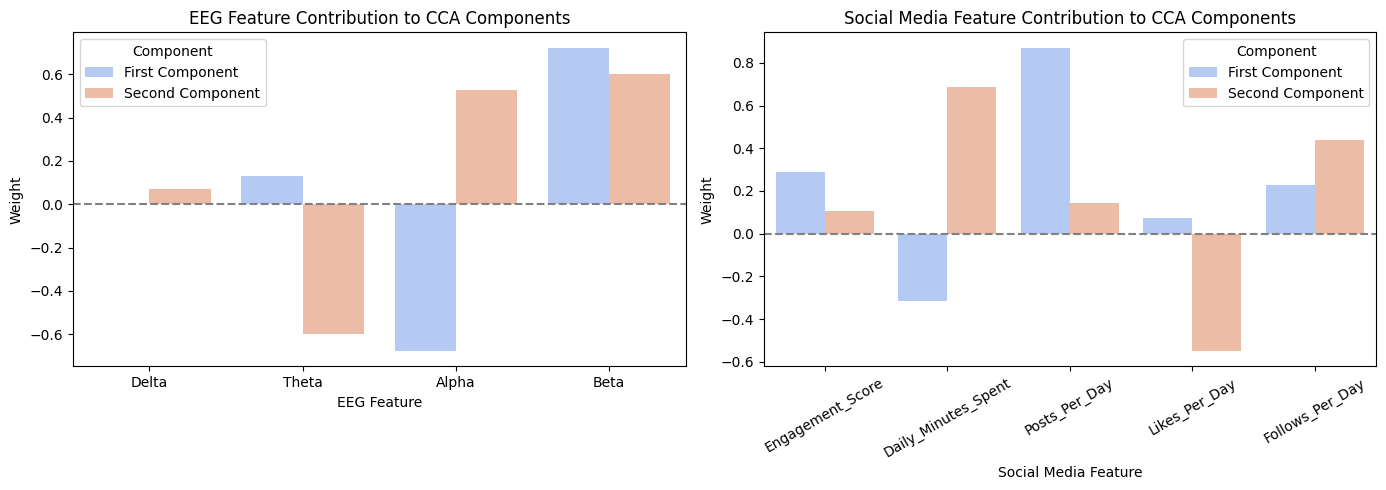

In [ ]:

# Define the component weights from your results
eeg_weights = pd.DataFrame({
    'EEG Feature': ['Delta', 'Theta', 'Alpha', 'Beta'],
    'First Component': [-0.000393, 0.130432, -0.677821, 0.723565],
    'Second Component': [0.069137, -0.596423, 0.527133, 0.601357]
})

social_weights = pd.DataFrame({
    'Social Media Feature': ['Engagement_Score', 'Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day'],
    'First Component': [0.289155, -0.315213, 0.871566, 0.071565, 0.228651],
    'Second Component': [0.106521, 0.686882, 0.142597, -0.549785, 0.440737]
})

# Plot EEG component weights
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=eeg_weights.melt(id_vars='EEG Feature', var_name='Component', value_name='Weight'),
            x='EEG Feature', y='Weight', hue='Component', palette='coolwarm')
plt.title("EEG Feature Contribution to CCA Components")
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title='Component')# Bin Daily_Minutes_Spent into categories
merged_df['Minutes_Bin'] = pd.cut(merged_df['Daily_Minutes_Spent'], bins=3, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(8, 5))
sns.histplot(data=merged_df, x='Beta', hue='Minutes_Bin', kde=True, bins=30, palette='Set1')
plt.title('Distribution of Beta by Daily Minutes Spent Levels')
plt.xlabel('Beta Wave Intensity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Plot Social Media component weights
plt.subplot(1, 2, 2)
sns.barplot(data=social_weights.melt(id_vars='Social Media Feature', var_name='Component', value_name='Weight'),
            x='Social Media Feature', y='Weight', hue='Component', palette='coolwarm')
plt.title("Social Media Feature Contribution to CCA Components")
plt.xticks(rotation=30)
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title='Component')

plt.tight_layout()
plt.show()
  

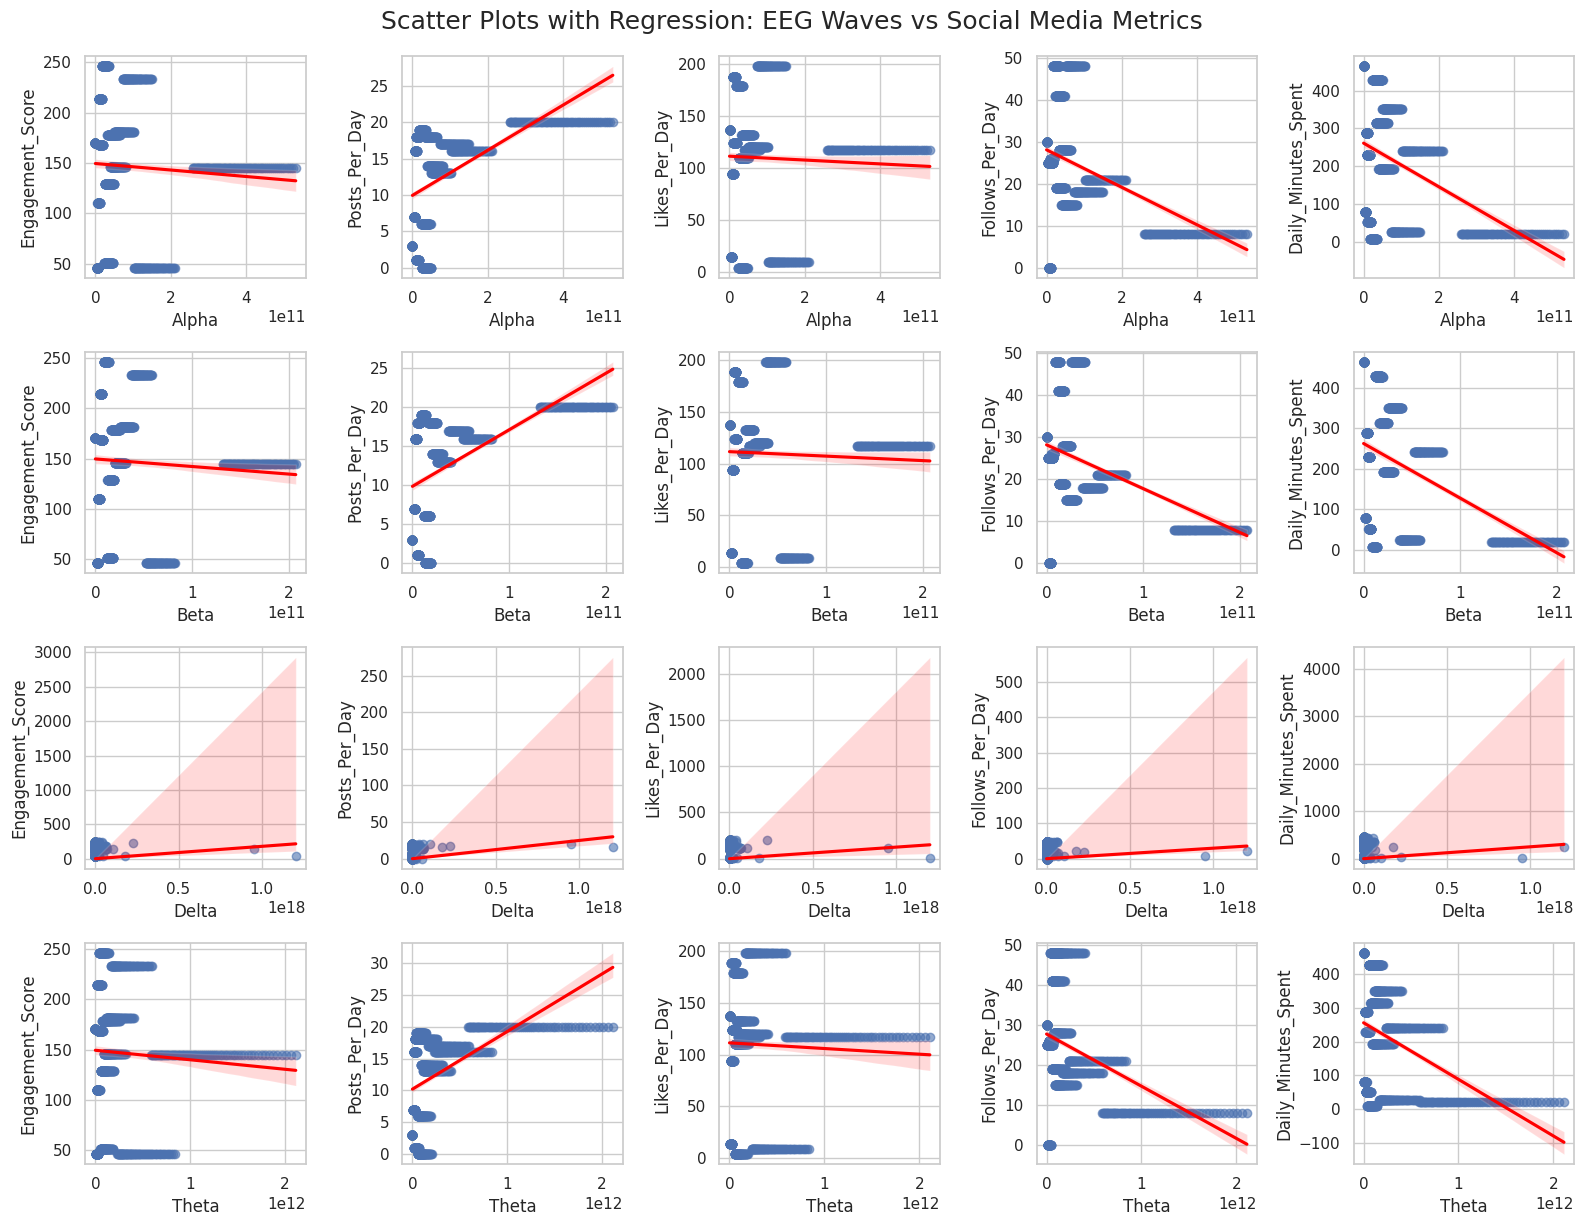

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define EEG and social features
eeg_features = ['Alpha', 'Beta', 'Delta', 'Theta']
social_features = ['Engagement_Score', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day','Daily_Minutes_Spent']

# Set up plot aesthetics
sns.set(style='whitegrid')
plt.figure(figsize=(16, 12))

# Create a grid of plots
plot_number = 1
for eeg in eeg_features:
    for social in social_features:
        plt.subplot(len(eeg_features), len(social_features), plot_number)
        sns.regplot(x=eeg, y=social, data=merged_df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
        plt.xlabel(eeg)
        plt.ylabel(social)
        plt.tight_layout()
        plot_number += 1

plt.suptitle("Scatter Plots with Regression: EEG Waves vs Social Media Metrics", fontsize=18, y=1.02)
plt.show()


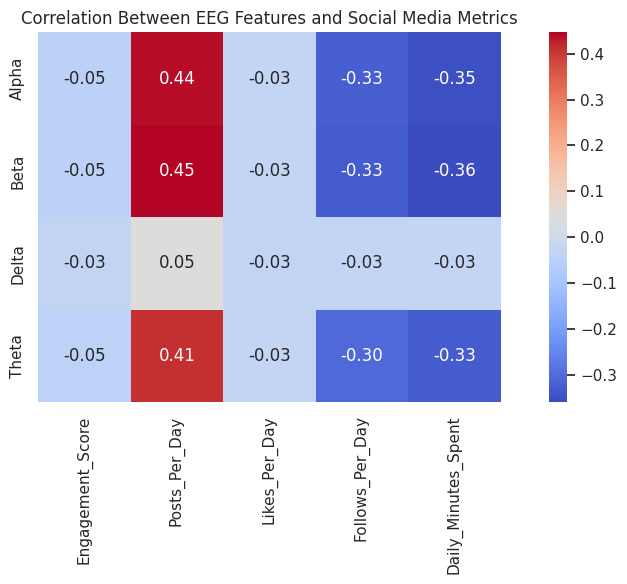

       Engagement_Score  Posts_Per_Day  Likes_Per_Day  Follows_Per_Day  \
Alpha         -0.049088       0.437780      -0.029577        -0.325058   
Beta          -0.049992       0.446549      -0.030085        -0.331577   
Delta         -0.033841       0.047675      -0.034065        -0.030884   
Theta         -0.046227       0.409669      -0.027990        -0.304155   

       Daily_Minutes_Spent  
Alpha            -0.353049  
Beta             -0.360153  
Delta            -0.027194  
Theta            -0.330262  


In [9]:
corr_subset = merged_df[eeg_features + social_features].corr()

# Extract only EEG vs Social correlations (upper-right block)
cross_corr = corr_subset.loc[eeg_features, social_features]

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Between EEG Features and Social Media Metrics")
plt.tight_layout()
plt.show()

print(cross_corr)

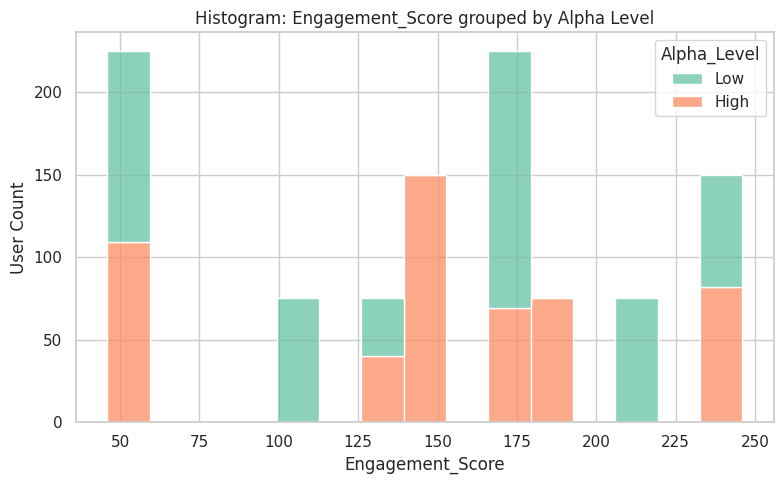

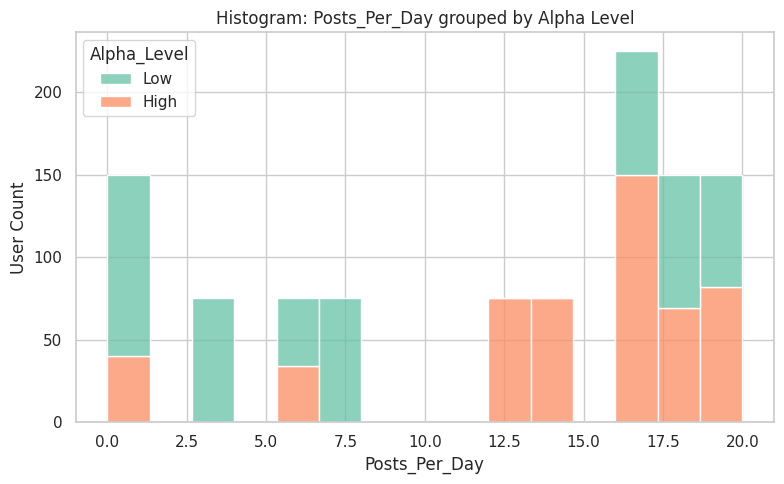

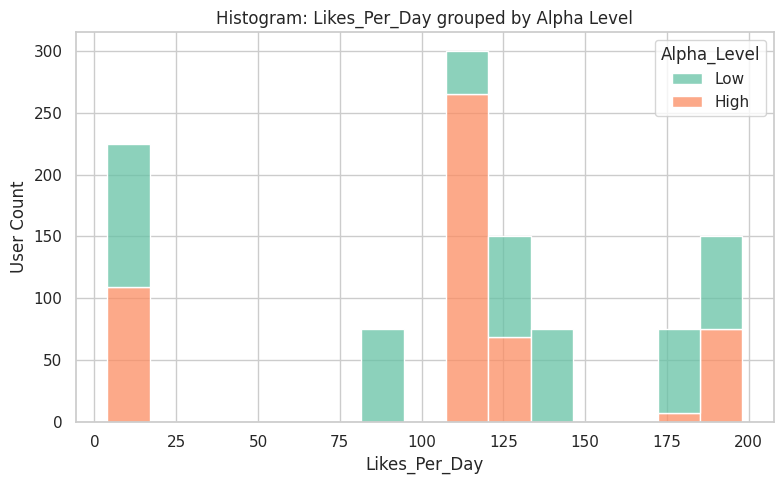

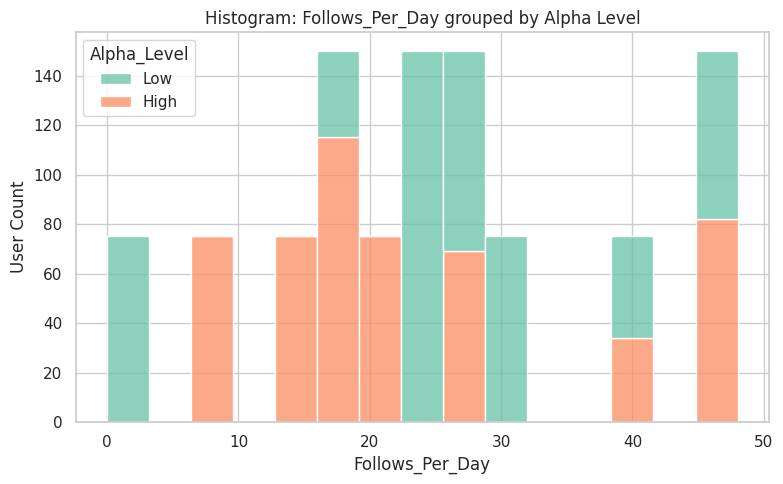

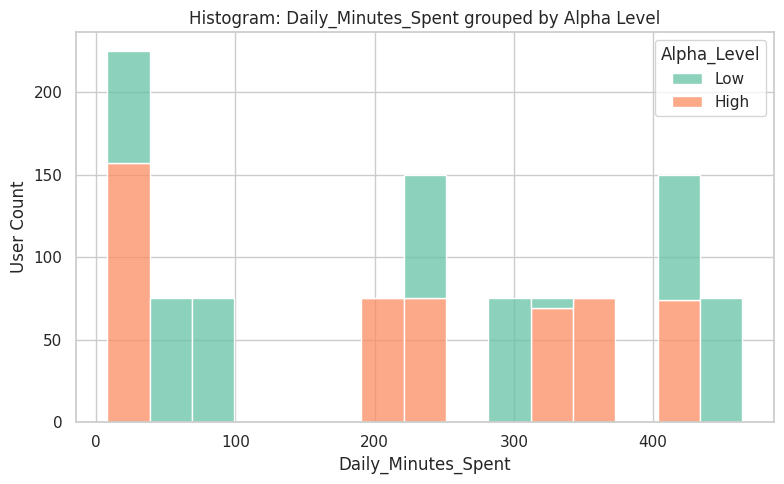

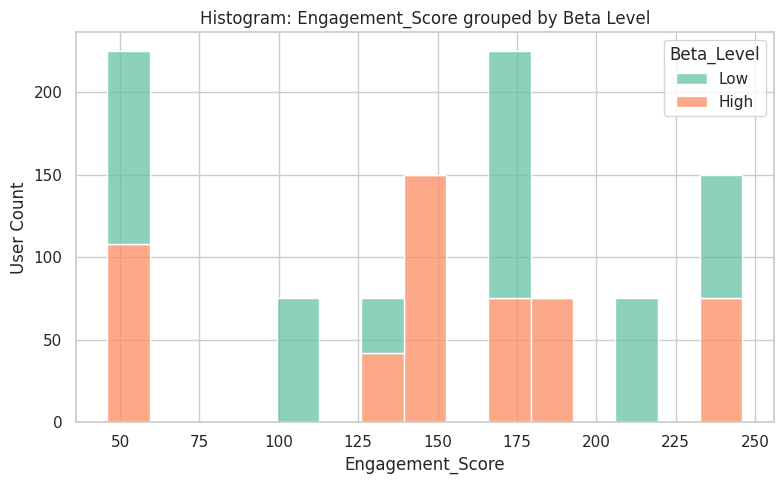

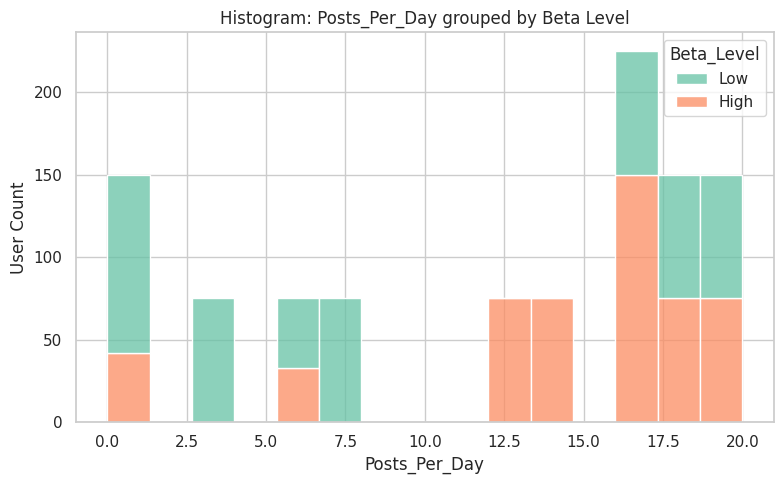

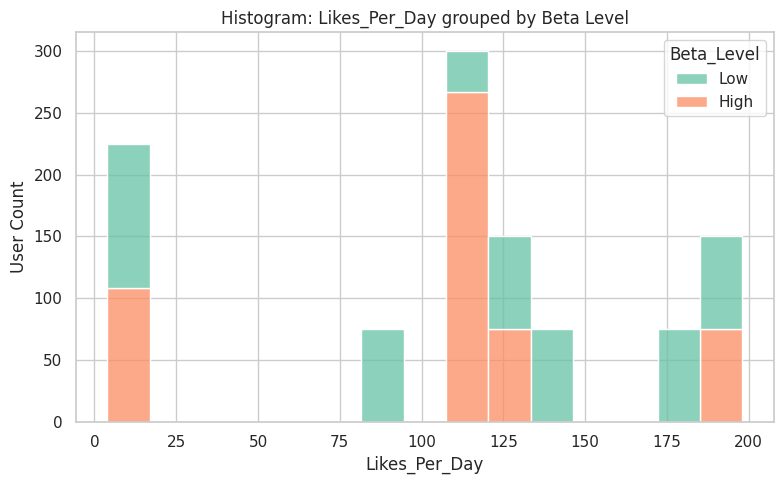

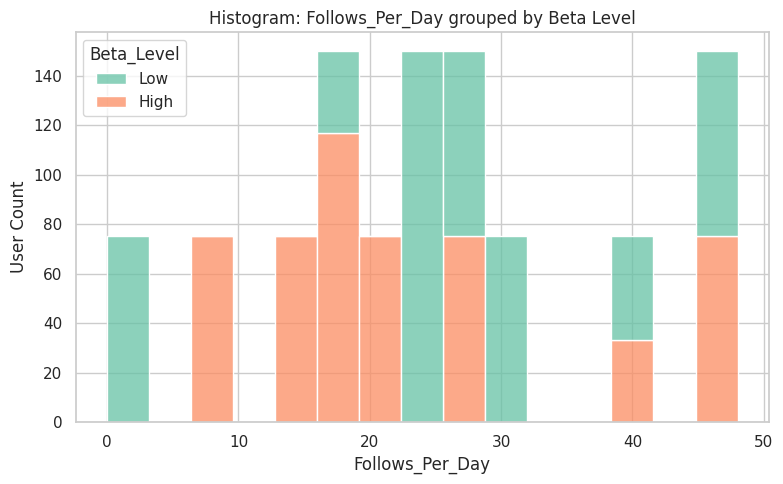

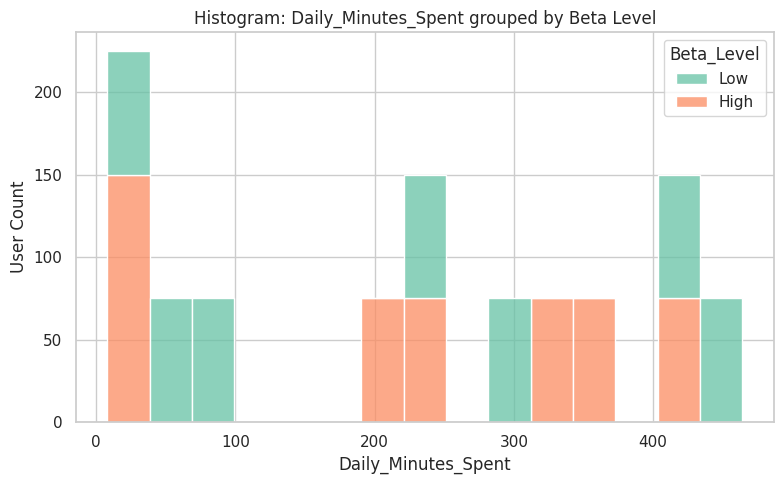

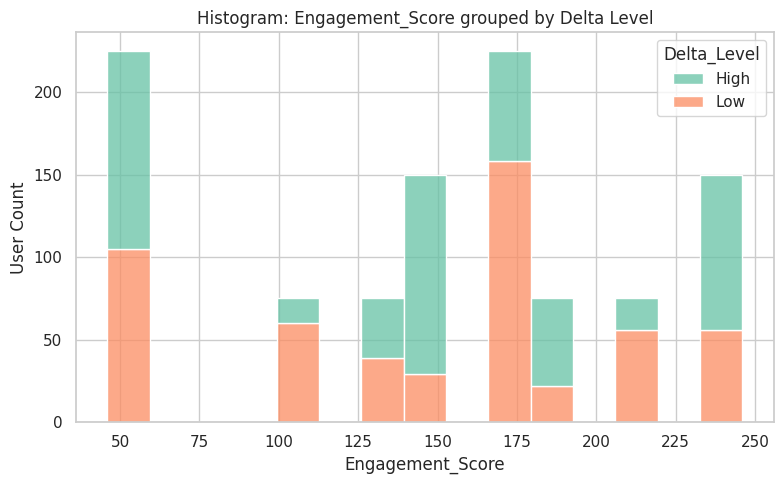

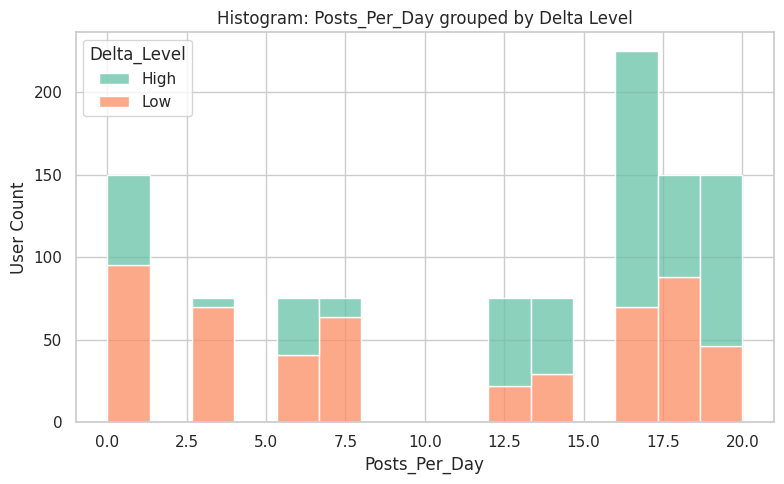

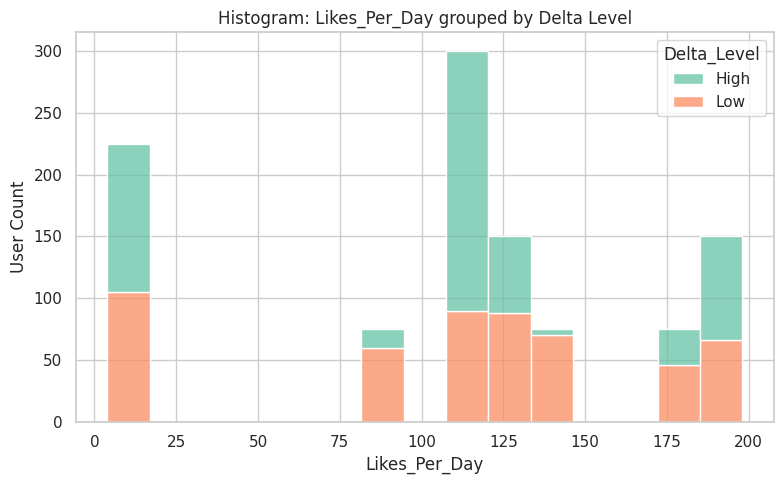

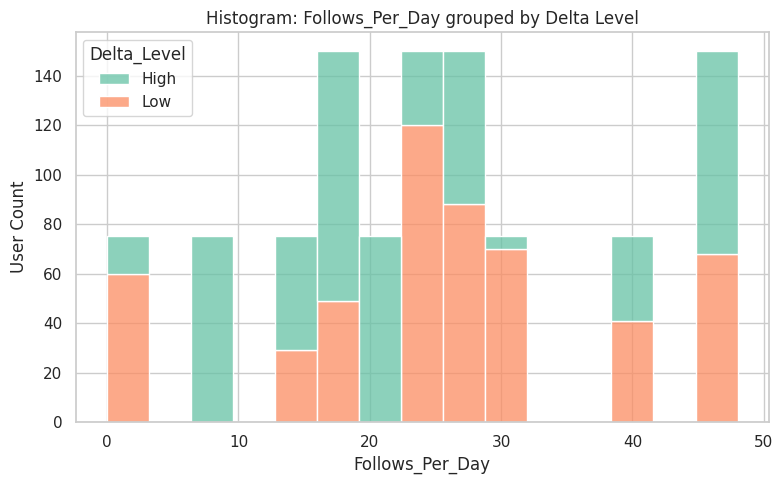

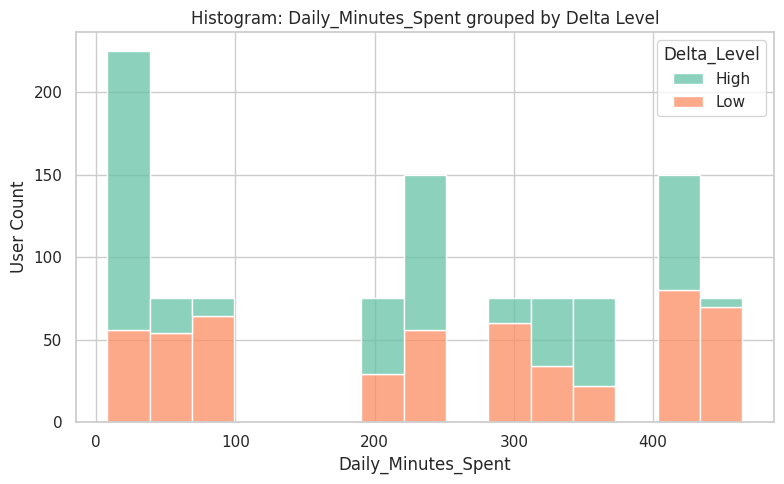

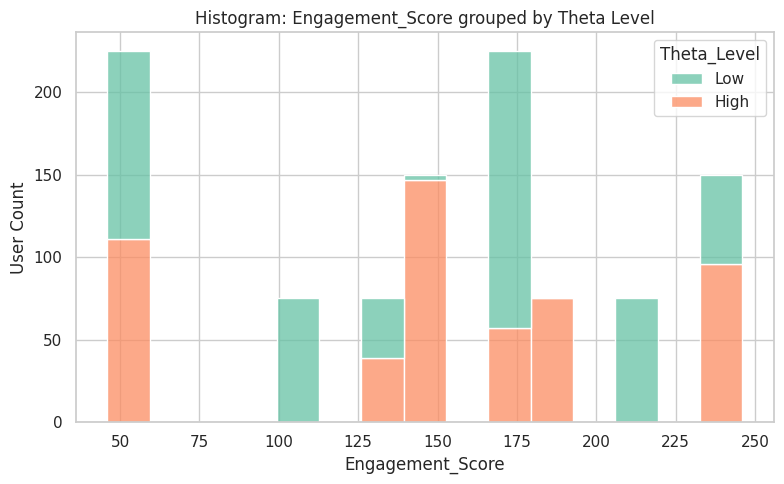

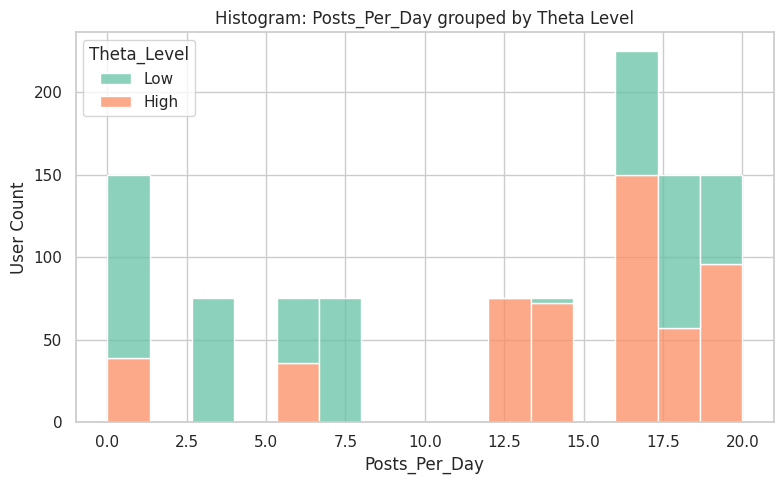

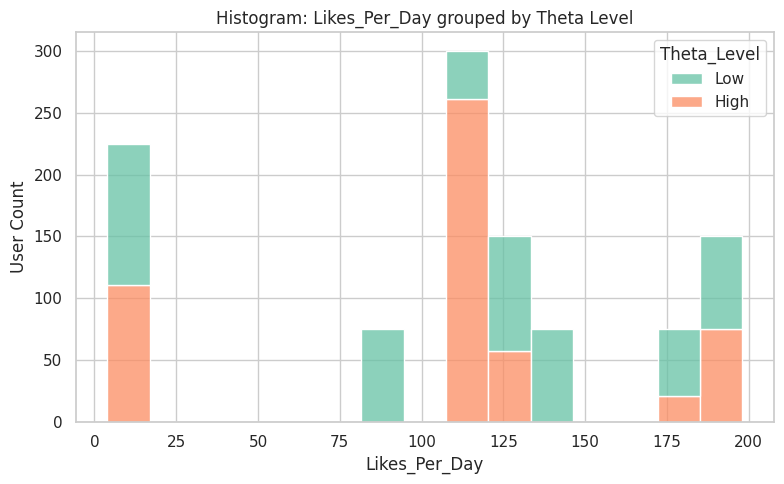

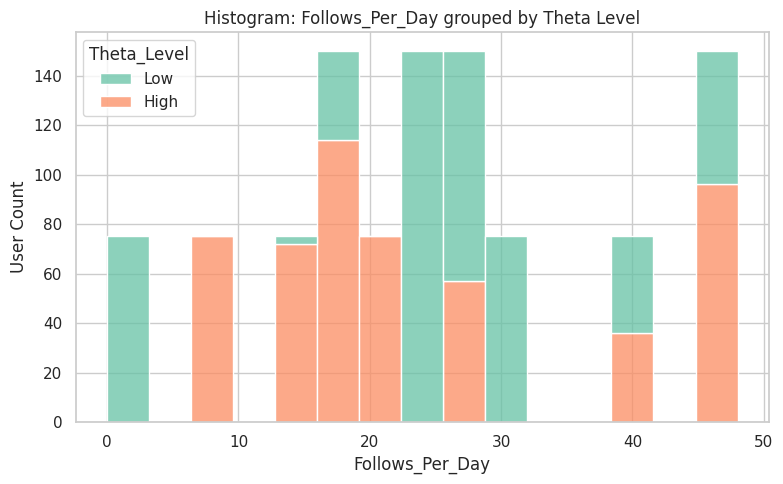

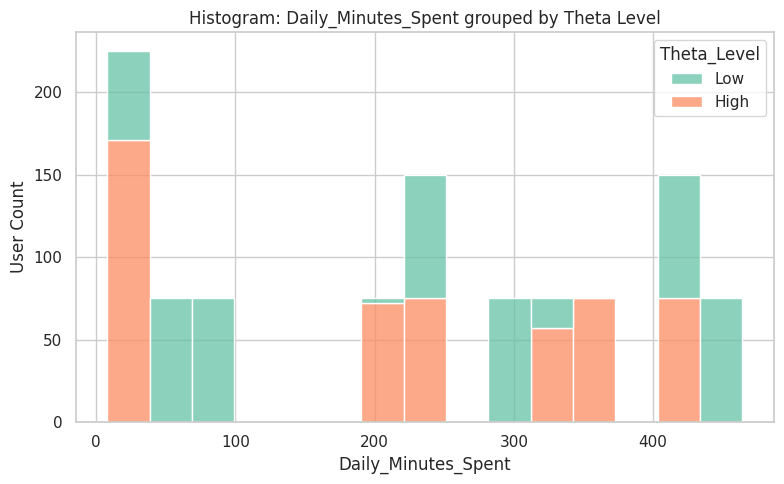

In [10]:
for eeg_wave in eeg_features:
    median_val = merged_df[eeg_wave].median()
    label = f"{eeg_wave}_Level"
    merged_df[label] = merged_df[eeg_wave].apply(lambda x: "High" if x > median_val else "Low")

# Plot histograms of each social feature grouped by EEG levels
for eeg_wave in eeg_features:
    label = f"{eeg_wave}_Level"
    for social in social_features:
        plt.figure(figsize=(8, 5))
        sns.histplot(data=merged_df, x=social, hue=label, bins=15, palette='Set2', multiple='stack')
        plt.title(f"Histogram: {social} grouped by {eeg_wave} Level")
        plt.xlabel(social)
        plt.ylabel("User Count")
        plt.tight_layout()
        plt.show()


/tmp/ipykernel_316011/2479955001.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=summary_melted, x='Social_Metric', y='Average_Value', hue='EEG_Level', palette='Set2', ci=None)


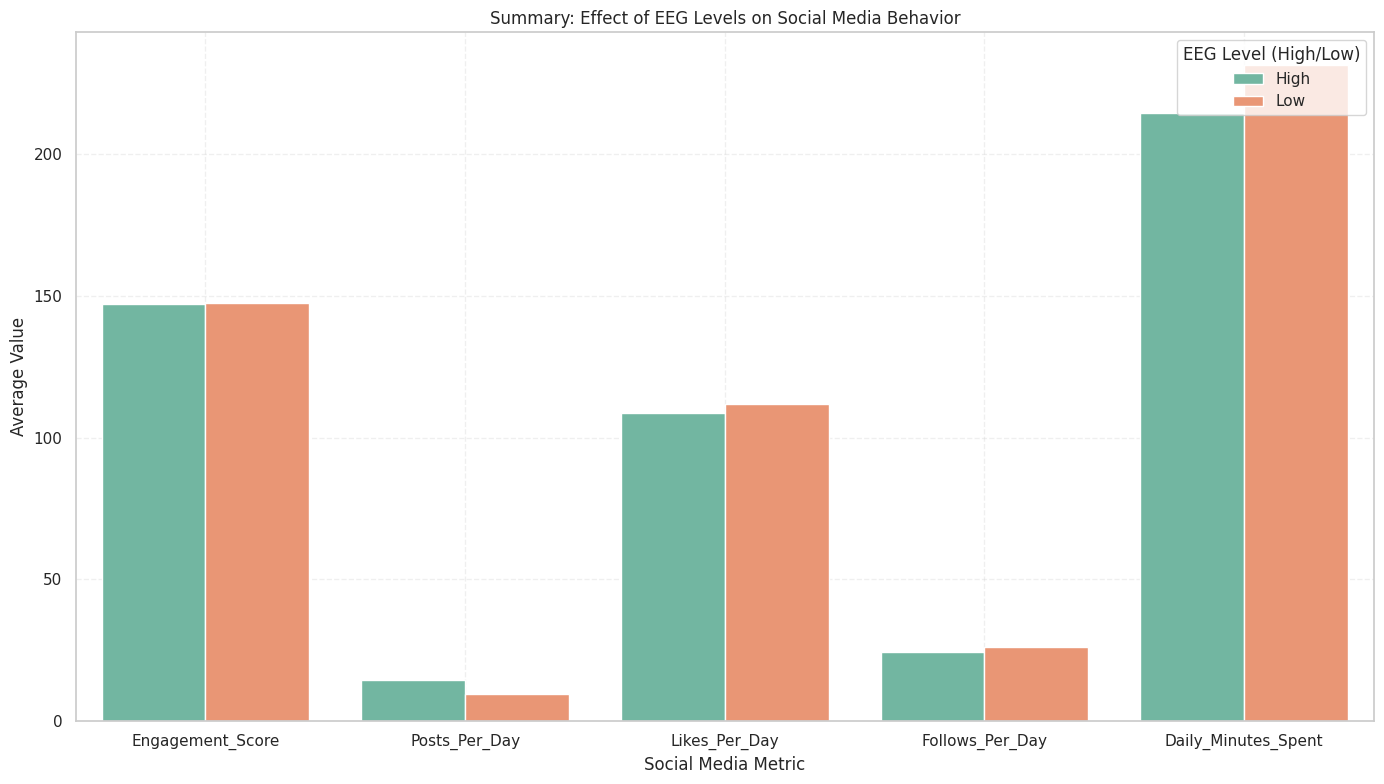

In [12]:
for eeg_wave in eeg_features:
    level_col = f"{eeg_wave}_Level"
    if level_col not in merged_df.columns:
        median_val = merged_df[eeg_wave].median()
        merged_df[level_col] = merged_df[eeg_wave].apply(lambda x: "High" if x > median_val else "Low")

# Melt the data to long-form for barplotting
summary_df = pd.DataFrame()
for eeg_wave in eeg_features:
    level_col = f"{eeg_wave}_Level"
    temp = merged_df.groupby(level_col)[social_features].mean().reset_index()
    temp['EEG_Wave'] = eeg_wave
    temp = temp.rename(columns={level_col: 'EEG_Level'})
    summary_df = pd.concat([summary_df, temp], axis=0)

# Melt for seaborn compatibility
summary_melted = pd.melt(
    summary_df,
    id_vars=['EEG_Wave', 'EEG_Level'],
    value_vars=social_features,
    var_name='Social_Metric',
    value_name='Average_Value'
)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=summary_melted, x='Social_Metric', y='Average_Value', hue='EEG_Level', palette='Set2', ci=None)
plt.title("Summary: Effect of EEG Levels on Social Media Behavior")
plt.xlabel("Social Media Metric")
plt.ylabel("Average Value")
plt.legend(title="EEG Level (High/Low)", loc="upper right")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

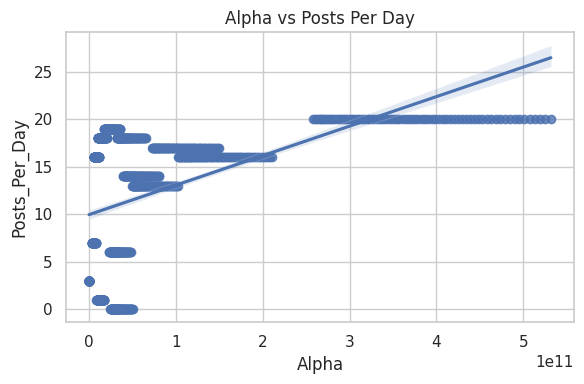

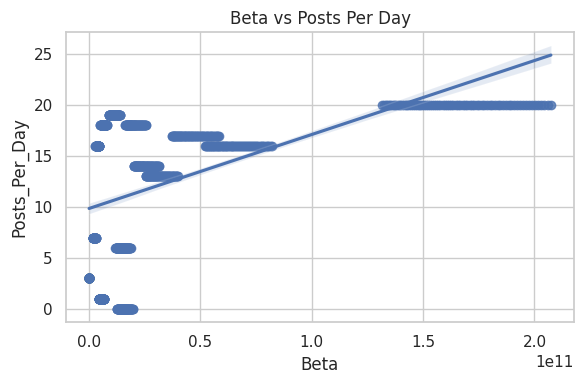

In [15]:
# Scatter plot: Alpha vs Posts_Per_Day
plt.figure(figsize=(6, 4))
sns.regplot(x='Alpha', y='Posts_Per_Day', data=merged_df)
plt.title('Alpha vs Posts Per Day')
plt.tight_layout()
plt.show()

# Scatter plot: Beta vs Posts_Per_Day
plt.figure(figsize=(6, 4))
sns.regplot(x='Beta', y='Posts_Per_Day', data=merged_df)
plt.title('Beta vs Posts Per Day')
plt.tight_layout()
plt.show()


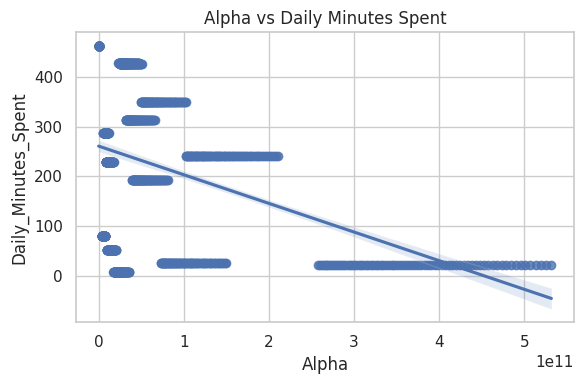

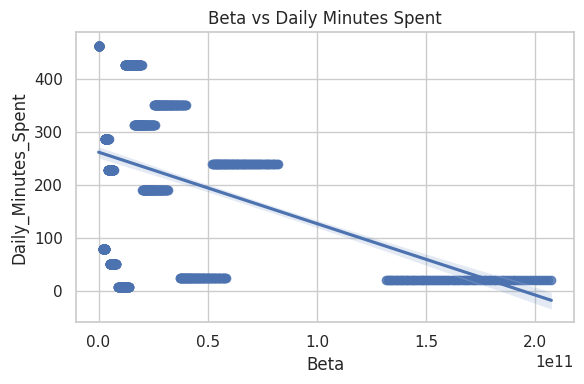

In [16]:
# Alpha vs Daily Minutes Spent
plt.figure(figsize=(6, 4))
sns.regplot(x='Alpha', y='Daily_Minutes_Spent', data=merged_df)
plt.title('Alpha vs Daily Minutes Spent')
plt.tight_layout()
plt.show()

# Beta vs Daily Minutes Spent
plt.figure(figsize=(6, 4))
sns.regplot(x='Beta', y='Daily_Minutes_Spent', data=merged_df)
plt.title('Beta vs Daily Minutes Spent')
plt.tight_layout()
plt.show()
